In [55]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [56]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [57]:
print(f"X Train Size: {len(X_train)}\n X Test Size: {len(X_test)}" )

X Train Size: 50000
 X Test Size: 10000


In [58]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [59]:
print(f"X Train Size: {len(X_train)}\n X Val Size: {len(X_val)}" )

X Train Size: 40000
 X Val Size: 10000


In [60]:
from tensorflow.keras.utils import to_categorical
print("once: " + str(y_train[5]))

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_val = to_categorical(y_val,10)

print("sonra: " + str(y_train[5]))

once: [3]
sonra: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


**MODEL - 0**

In [61]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3))) # 30*30*32
model.add( tf.keras.layers.Dropout(0.20))                               

model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #28*28*32
model.add( tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #26*26*32

model.add(tf.keras.layers.MaxPooling2D((2,2))) #13*13*32
model.add( tf.keras.layers.Dropout(0.30))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add( tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [62]:
results = model.fit(X_train, y_train, epochs=35, batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/35
1250/1250 [==============================] - 8s 6ms/step - loss: 2.7284 - accuracy: 0.1926 - val_loss: 1.7288 - val_accuracy: 0.3809
Epoch 2/35
1250/1250 [==============================] - 7s 6ms/step - loss: 1.7066 - accuracy: 0.3820 - val_loss: 1.4982 - val_accuracy: 0.4666
Epoch 3/35
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5232 - accuracy: 0.4516 - val_loss: 1.4119 - val_accuracy: 0.5129
Epoch 4/35
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4268 - accuracy: 0.4879 - val_loss: 1.2861 - val_accuracy: 0.5615
Epoch 5/35
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3564 - accuracy: 0.5177 - val_loss: 1.2390 - val_accuracy: 0.5687
Epoch 6/35
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3077 - accuracy: 0.5343 - val_loss: 1.1836 - val_accuracy: 0.5881
Epoch 7/35
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2662 - accuracy: 0.5541 - val_loss: 1.1289 - val_accuracy:

In [63]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0373 - accuracy: 0.6445


[1.0373345613479614, 0.6445000171661377]

**MODEL - 1**

In [64]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3))) 
model_1.add( tf.keras.layers.Dropout(0.20))                               

model_1.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model_1.add( tf.keras.layers.Dropout(0.25))   

model_1.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) 

model_1.add(tf.keras.layers.MaxPooling2D((2,2))) 
model_1.add( tf.keras.layers.Dropout(0.30))

model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(256, activation="relu"))
model_1.add( tf.keras.layers.Dropout(0.5))

model_1.add(tf.keras.layers.Dense(10, activation="softmax"))
model_1.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [65]:
results_1 = model_1.fit(X_train, y_train, epochs=35, batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/35
1250/1250 [==============================] - 13s 10ms/step - loss: 3.2478 - accuracy: 0.1730 - val_loss: 1.9222 - val_accuracy: 0.3124
Epoch 2/35
1250/1250 [==============================] - 12s 10ms/step - loss: 1.7694 - accuracy: 0.3480 - val_loss: 1.4818 - val_accuracy: 0.4675
Epoch 3/35
1250/1250 [==============================] - 12s 10ms/step - loss: 1.5321 - accuracy: 0.4450 - val_loss: 1.3497 - val_accuracy: 0.5033
Epoch 4/35
1250/1250 [==============================] - 12s 10ms/step - loss: 1.4199 - accuracy: 0.4915 - val_loss: 1.2749 - val_accuracy: 0.5568
Epoch 5/35
1250/1250 [==============================] - 12s 10ms/step - loss: 1.3415 - accuracy: 0.5208 - val_loss: 1.3091 - val_accuracy: 0.5347
Epoch 6/35
1250/1250 [==============================] - 12s 10ms/step - loss: 1.2710 - accuracy: 0.5476 - val_loss: 1.2057 - val_accuracy: 0.5859
Epoch 7/35
1250/1250 [==============================] - 12s 10ms/step - loss: 1.2211 - accuracy: 0.5696 - val_loss: 1.1412 -

In [66]:
model_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0330 - accuracy: 0.6475


[1.0329681634902954, 0.6474999785423279]

**MODEL - 2**

In [67]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3))) # 30*30*32
model_2.add( tf.keras.layers.Dropout(0.20))                               

model_2.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #28*28*32
model_2.add( tf.keras.layers.Dropout(0.25)) 

model_2.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #26*26*32

model_2.add(tf.keras.layers.MaxPooling2D((2,2))) #13*13*32
model_2.add( tf.keras.layers.Dropout(0.30))

model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(256, activation="relu"))
model_2.add( tf.keras.layers.Dropout(0.5))

model_2.add(tf.keras.layers.Dense(10, activation="softmax"))
model_2.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [68]:
results_2 = model_2.fit(X_train, y_train, epochs=35, batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/35
1250/1250 [==============================] - 11s 8ms/step - loss: 2.1863 - accuracy: 0.3091 - val_loss: 1.6444 - val_accuracy: 0.4337
Epoch 2/35
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6484 - accuracy: 0.3990 - val_loss: 1.6280 - val_accuracy: 0.4162
Epoch 3/35
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5726 - accuracy: 0.4292 - val_loss: 1.4640 - val_accuracy: 0.4732
Epoch 4/35
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5105 - accuracy: 0.4589 - val_loss: 1.4463 - val_accuracy: 0.4864
Epoch 5/35
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4695 - accuracy: 0.4736 - val_loss: 1.3551 - val_accuracy: 0.5235
Epoch 6/35
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4438 - accuracy: 0.4812 - val_loss: 1.3427 - val_accuracy: 0.5501
Epoch 7/35
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4061 - accuracy: 0.4956 - val_loss: 1.3010 - val_ac

In [69]:
model_2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1571 - accuracy: 0.5965


[1.1570637226104736, 0.5964999794960022]

**MODEL - 3**

In [70]:
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3))) # 30*30*32
model_3.add( tf.keras.layers.Dropout(0.20))                               

model_3.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #28*28*32
model_3.add( tf.keras.layers.Dropout(0.25))  

model_3.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #26*26*32

model_3.add(tf.keras.layers.MaxPooling2D((2,2))) #13*13*32
model_3.add( tf.keras.layers.Dropout(0.30))

model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dense(256, activation="relu"))
model_3.add( tf.keras.layers.Dropout(0.5))

model_3.add(tf.keras.layers.Dense(10, activation="softmax"))
model_3.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [71]:
results_3 = model_3.fit(X_train, y_train, epochs=35, batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/35
1250/1250 [==============================] - 17s 13ms/step - loss: 2.3830 - accuracy: 0.2704 - val_loss: 1.8295 - val_accuracy: 0.3521
Epoch 2/35
1250/1250 [==============================] - 15s 12ms/step - loss: 1.6085 - accuracy: 0.4221 - val_loss: 1.5036 - val_accuracy: 0.4665
Epoch 3/35
1250/1250 [==============================] - 15s 12ms/step - loss: 1.5187 - accuracy: 0.4551 - val_loss: 1.4250 - val_accuracy: 0.5085
Epoch 4/35
1250/1250 [==============================] - 17s 13ms/step - loss: 1.4902 - accuracy: 0.4712 - val_loss: 1.4395 - val_accuracy: 0.4932
Epoch 5/35
1250/1250 [==============================] - 15s 12ms/step - loss: 1.4269 - accuracy: 0.4924 - val_loss: 1.3455 - val_accuracy: 0.5383
Epoch 6/35
1250/1250 [==============================] - 15s 12ms/step - loss: 1.4001 - accuracy: 0.5030 - val_loss: 1.2767 - val_accuracy: 0.5560
Epoch 7/35
1250/1250 [==============================] - 15s 12ms/step - loss: 1.3718 - accuracy: 0.5155 - val_loss: 1.2710 -

In [72]:
model_3.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.4648 - accuracy: 0.4863


[1.464847207069397, 0.486299991607666]

**MODEL - 4**

In [73]:
model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3))) # 30*30*32
model_4.add( tf.keras.layers.Dropout(0.20))                               

model_4.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #28*28*32

model_4.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #26*26*32
model_4.add( tf.keras.layers.Dropout(0.25))

model_4.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #28*28*32

model_4.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #26*26*32

model_4.add(tf.keras.layers.MaxPooling2D((2,2))) #13*13*32
model_4.add( tf.keras.layers.Dropout(0.30))

model_4.add(tf.keras.layers.Flatten())
model_4.add(tf.keras.layers.Dense(256, activation="relu"))
model_4.add( tf.keras.layers.Dropout(0.50))

model_4.add(tf.keras.layers.Dense(10, activation="softmax"))
model_4.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [74]:
results_4 = model_4.fit(X_train, y_train, epochs=35, batch_size = 32, validation_data=(X_val, y_val)) #epoch 50 dene

Epoch 1/35
1250/1250 [==============================] - 10s 8ms/step - loss: 2.1511 - accuracy: 0.2592 - val_loss: 1.7209 - val_accuracy: 0.3853
Epoch 2/35
1250/1250 [==============================] - 9s 8ms/step - loss: 1.6038 - accuracy: 0.4138 - val_loss: 1.4215 - val_accuracy: 0.4839
Epoch 3/35
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4626 - accuracy: 0.4712 - val_loss: 1.3113 - val_accuracy: 0.5303
Epoch 4/35
1250/1250 [==============================] - 10s 8ms/step - loss: 1.3509 - accuracy: 0.5126 - val_loss: 1.1899 - val_accuracy: 0.5792
Epoch 5/35
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2787 - accuracy: 0.5437 - val_loss: 1.1502 - val_accuracy: 0.6042
Epoch 6/35
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2245 - accuracy: 0.5640 - val_loss: 1.1514 - val_accuracy: 0.5851
Epoch 7/35
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1804 - accuracy: 0.5804 - val_loss: 1.0744 - val_accura

In [75]:
model_4.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9549 - accuracy: 0.6688


[0.9548811316490173, 0.6687999963760376]

**MODEL - 5**

In [76]:
model_5 = tf.keras.Sequential()
model_5.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3))) # 30*30*32
model_5.add(tf.keras.layers.Dropout(0.20))                           

model_5.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #28*28*32


model_5.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #26*26*32
model_5.add(tf.keras.layers.Dropout(0.25))

model_5.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #28*28*32


model_5.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #26*26*32

model_5.add(tf.keras.layers.MaxPooling2D((2,2))) #13*13*32
model_5.add(tf.keras.layers.Dropout(0.30))

model_5.add(tf.keras.layers.Flatten())
model_5.add(tf.keras.layers.Dense(256, activation="relu"))
model_5.add(tf.keras.layers.Dropout(0.50))

model_5.add(tf.keras.layers.Dense(10, activation="softmax"))
model_5.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [77]:
results_5 = model_5.fit(X_train, y_train, epochs=35,  batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/35
1250/1250 [==============================] - 19s 15ms/step - loss: 2.3664 - accuracy: 0.2203 - val_loss: 1.6378 - val_accuracy: 0.4107
Epoch 2/35
1250/1250 [==============================] - 17s 14ms/step - loss: 1.5706 - accuracy: 0.4279 - val_loss: 1.3025 - val_accuracy: 0.5342
Epoch 3/35
1250/1250 [==============================] - 17s 14ms/step - loss: 1.3742 - accuracy: 0.5072 - val_loss: 1.3187 - val_accuracy: 0.5365
Epoch 4/35
1250/1250 [==============================] - 18s 14ms/step - loss: 1.2658 - accuracy: 0.5519 - val_loss: 1.1677 - val_accuracy: 0.5989
Epoch 5/35
1250/1250 [==============================] - 18s 15ms/step - loss: 1.1783 - accuracy: 0.5835 - val_loss: 1.0963 - val_accuracy: 0.6191
Epoch 6/35
1250/1250 [==============================] - 17s 13ms/step - loss: 1.1136 - accuracy: 0.6030 - val_loss: 1.0364 - val_accuracy: 0.6363
Epoch 7/35
1250/1250 [==============================] - 17s 13ms/step - loss: 1.0650 - accuracy: 0.6240 - val_loss: 1.0166 -

In [78]:
model_5.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.0757 - accuracy: 0.6792


[1.0756839513778687, 0.6791999936103821]

**MODEL - 6**

In [79]:
model_6 = tf.keras.Sequential()
model_6.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3))) # 30*30*32
model_6.add( tf.keras.layers.Dropout(0.20))                               

model_6.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #28*28*32

model_6.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #26*26*32
model_6.add( tf.keras.layers.Dropout(0.25))

model_6.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #28*28*32

model_6.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #26*26*32

model_6.add(tf.keras.layers.MaxPooling2D((2,2))) #13*13*32
model_6.add( tf.keras.layers.Dropout(0.30))

model_6.add(tf.keras.layers.Flatten())
model_6.add(tf.keras.layers.Dense(256, activation="relu"))
model_6.add( tf.keras.layers.Dropout(0.50))

model_6.add(tf.keras.layers.Dense(10, activation="softmax"))
model_6.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [80]:
results_6 = model_6.fit(X_train, y_train, epochs=35, batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/35
1250/1250 [==============================] - 15s 12ms/step - loss: 1.9721 - accuracy: 0.3001 - val_loss: 1.5269 - val_accuracy: 0.4504
Epoch 2/35
1250/1250 [==============================] - 16s 12ms/step - loss: 1.5754 - accuracy: 0.4268 - val_loss: 1.4854 - val_accuracy: 0.4485
Epoch 3/35
1250/1250 [==============================] - 14s 11ms/step - loss: 1.4701 - accuracy: 0.4688 - val_loss: 1.3241 - val_accuracy: 0.5239
Epoch 4/35
1250/1250 [==============================] - 16s 12ms/step - loss: 1.4156 - accuracy: 0.4895 - val_loss: 1.3681 - val_accuracy: 0.5169
Epoch 5/35
1250/1250 [==============================] - 14s 11ms/step - loss: 1.3646 - accuracy: 0.5120 - val_loss: 1.2659 - val_accuracy: 0.5478
Epoch 6/35
1250/1250 [==============================] - 15s 12ms/step - loss: 1.3260 - accuracy: 0.5248 - val_loss: 1.2497 - val_accuracy: 0.5516
Epoch 7/35
1250/1250 [==============================] - 14s 11ms/step - loss: 1.2953 - accuracy: 0.5405 - val_loss: 1.2715 -

In [81]:
model_6.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.1173 - accuracy: 0.6137


[1.1172935962677002, 0.6136999726295471]

**MODEL - 7**

In [82]:
model_7 = tf.keras.Sequential()
model_7.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3))) # 30*30*32
model_7.add( tf.keras.layers.Dropout(0.20))                               

model_7.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #28*28*32

model_7.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #26*26*32
model_7.add( tf.keras.layers.Dropout(0.25))

model_7.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #28*28*32

model_7.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu")) #26*26*32

model_7.add(tf.keras.layers.MaxPooling2D((2,2))) #13*13*32
model_7.add( tf.keras.layers.Dropout(0.30))

model_7.add(tf.keras.layers.Flatten())
model_7.add(tf.keras.layers.Dense(256, activation="relu"))
model_7.add( tf.keras.layers.Dropout(0.50))

model_7.add(tf.keras.layers.Dense(10, activation="softmax"))
model_7.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [83]:
results_7 = model_7.fit(X_train, y_train, epochs=35, batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/35
1250/1250 [==============================] - 26s 21ms/step - loss: 2.3270 - accuracy: 0.1750 - val_loss: 1.8118 - val_accuracy: 0.3339
Epoch 2/35
1250/1250 [==============================] - 26s 20ms/step - loss: 1.7354 - accuracy: 0.3656 - val_loss: 1.5029 - val_accuracy: 0.4574
Epoch 3/35
1250/1250 [==============================] - 25s 20ms/step - loss: 1.5716 - accuracy: 0.4324 - val_loss: 1.5002 - val_accuracy: 0.4627
Epoch 4/35
1250/1250 [==============================] - 25s 20ms/step - loss: 1.4813 - accuracy: 0.4668 - val_loss: 1.3823 - val_accuracy: 0.5078
Epoch 5/35
1250/1250 [==============================] - 25s 20ms/step - loss: 1.4181 - accuracy: 0.4922 - val_loss: 1.3360 - val_accuracy: 0.5132
Epoch 6/35
1250/1250 [==============================] - 25s 20ms/step - loss: 1.3715 - accuracy: 0.5083 - val_loss: 1.2943 - val_accuracy: 0.5421
Epoch 7/35
1250/1250 [==============================] - 25s 20ms/step - loss: 1.3363 - accuracy: 0.5226 - val_loss: 1.3273 -

In [86]:
model_7.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 1.1016 - accuracy: 0.6320


[1.1015820503234863, 0.6320000290870667]

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [88]:
y_preds = model_5.predict(X_test)
y_pred=y_preds.argmax(axis=1)
y_test=y_test.argmax(axis=1)

313/313 [==============================] - 1s 4ms/step


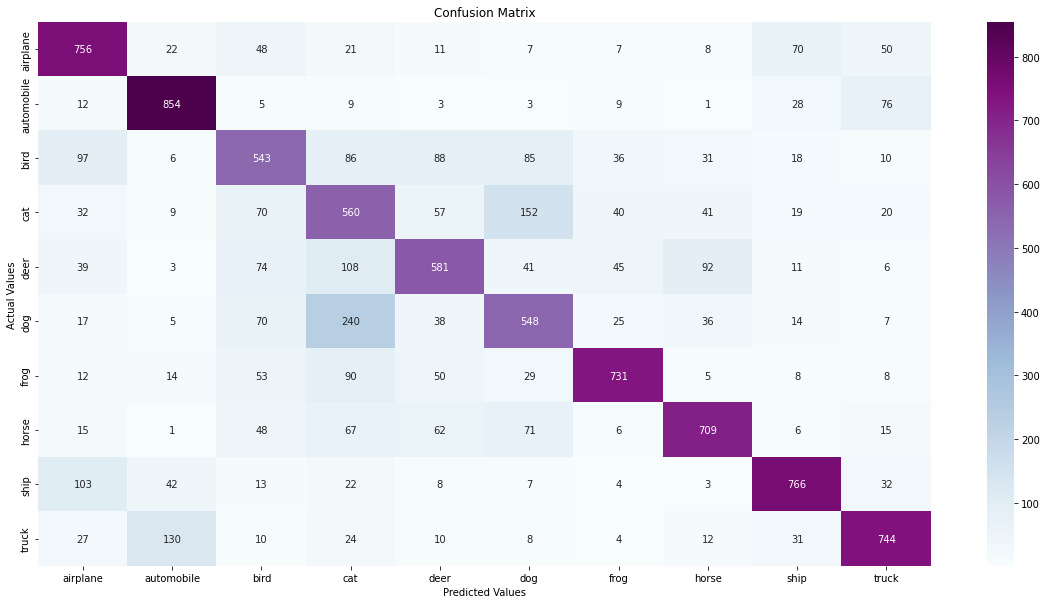

In [89]:
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=class_names,
       columns=class_names)
plt.figure(figsize=(20,10))
sns.heatmap(cm_df, annot=True,cmap='BuPu', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [90]:
import random;
test = [];
classes = [];
counter = 0;
i=0;

for x in range(10):
  counter = 0;
  i = 0;
  while(i < len(y_test) and counter < 3):
    if y_test[i] != x:
      i = i + random.randint(0,100);
    else:
      test.append(i);
      i = i + random.randint(0,100);
      counter = counter + 1;

print(y_test[test])
print(test)


[0 0 0 1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6 7 7 7 8 8 8 9 9 9]
[1067, 1323, 2215, 1158, 1234, 1970, 357, 436, 1110, 0, 573, 1166, 555, 1292, 1546, 275, 343, 579, 529, 1766, 2203, 1215, 1333, 1616, 197, 717, 724, 335, 364, 508]


In [97]:
y_pred2 = []
y_test2 = []

for i in test:
  y_pred2.append(y_pred[i])
  y_test2.append(y_test[i])


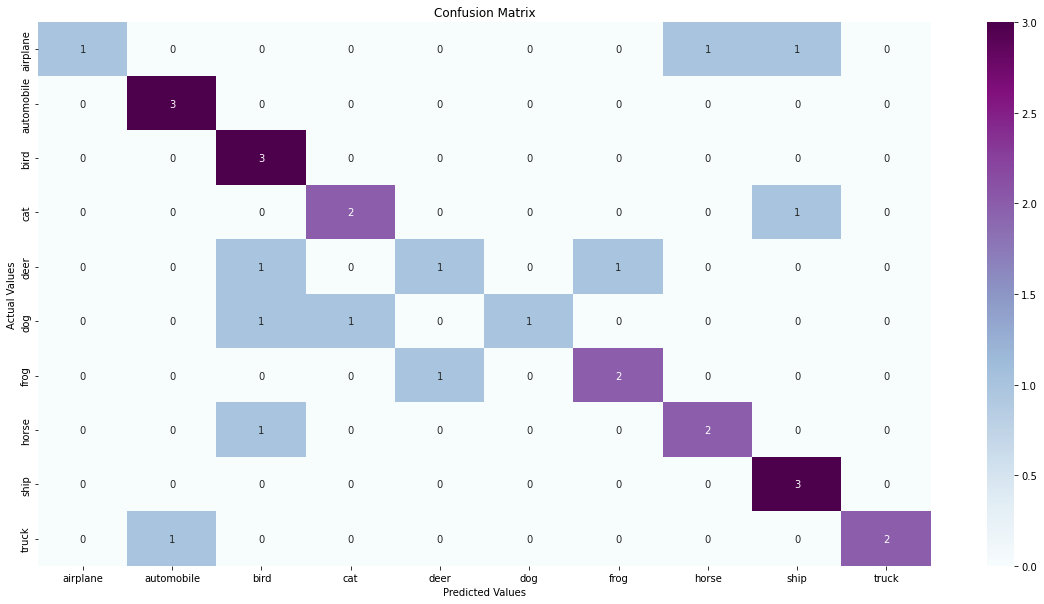

In [99]:
cm=confusion_matrix(y_test2,y_pred2)
cm_df=pd.DataFrame(cm,index=class_names,
       columns=class_names)
plt.figure(figsize=(20,10))
sns.heatmap(cm_df, annot=True,cmap='BuPu', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()